# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [122]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [123]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [124]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        self.loss = np.sum(np.power((np.matmul(X, w) - y), 2)) / X.shape[0]
        return(self.loss)
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        
        gradQ = 2* (np.matmul(X.transpose(), np.matmul(X, w)-y)) / X.shape[0] 
        return(gradQ)
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [125]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [126]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 10000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    
    w_list = np.array([w_init])
    for i in range(n_iterations):
        a = loss.calc_grad(X, y, w_init) * lr
        w_init = w_init - a
        w_list = np.append(w_list, [w_init], axis = 0)
    return(w_list)

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [127]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)


(300, 2)
(300,)


In [128]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)

print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))


425.58917680450253
0.8670644395649493


In [129]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

lr = 0.0001


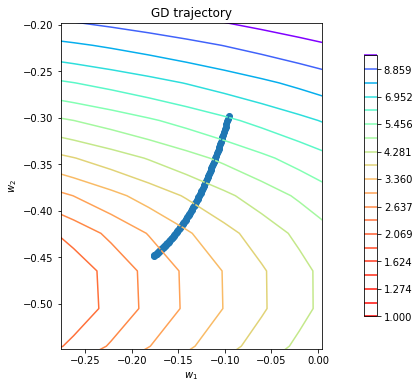

lr = 0.0005


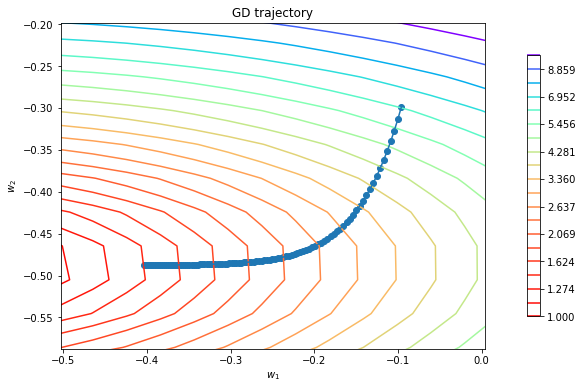

lr = 0.005


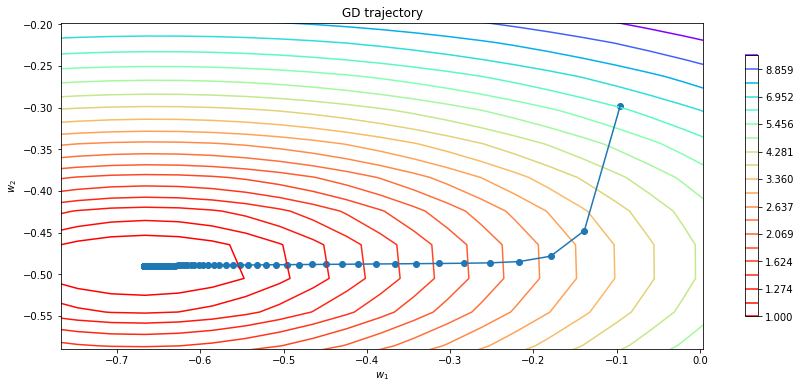

lr = 0.01


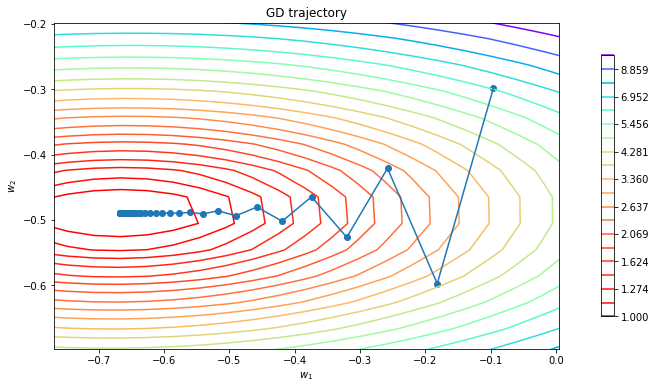

In [130]:
# -- YOUR CODE HERE --
lr_list = np.array([0.0001, 0.0005, 0.005, 0.01]) 
loss = MSELoss()
w_init = np.random.uniform(-2, 2, (n_features))
for i in lr_list:
    w_list = gradient_descent(w_init, X, y, loss, i, 100)
    print('lr =',i)
    plot_gd(w_list, X, y, loss)

#lr = 0.0001 слишком маленький шаг и минимум на функционале ошибки не достигается
#lr = 0.0005 уже лучше но минимум не достигается
#lr = 0.005 лучший из всех представленных вариантов, т.к достигается минимум и спуск плавный 
#lr = 0.01 минимум достикается, но спуск не плавный
# влияние lr - чем меньше lr, тем плавнее спуск, но при малых lr нужно сильно увеличить n_iterations
# при большом lr теряется плавность, и градиентный спуск может "расколбасить", при очень больших lr спуск может начать шагать вверх

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [131]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
      
    loss = MSELoss()
    w_list = np.array([w_init])
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batchX = X[batch_indices]
        batchY = y[batch_indices]
        a = loss.calc_grad(batchX, batchY, w_init) * lr
        w_init = w_init - a
        w_list = np.append(w_list, [w_init], axis = 0)
    return(w_list)
    

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr = 0.0005 ; batch size = 6


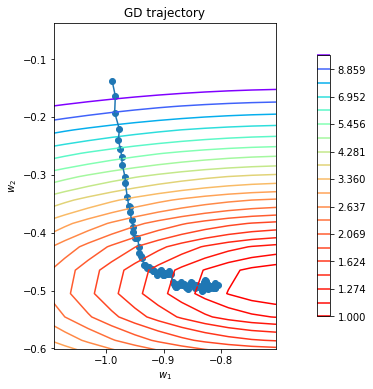

lr = 0.0035 ; batch size = 10


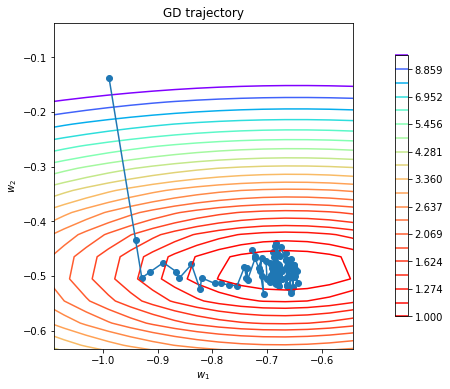

lr = 0.005 ; batch size = 60


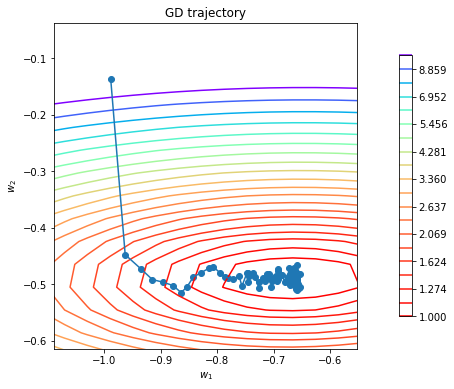

lr = 0.005 ; batch size = 150


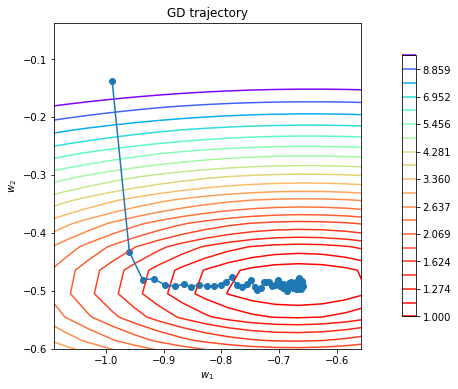

lr = 0.01 ; batch size = 17


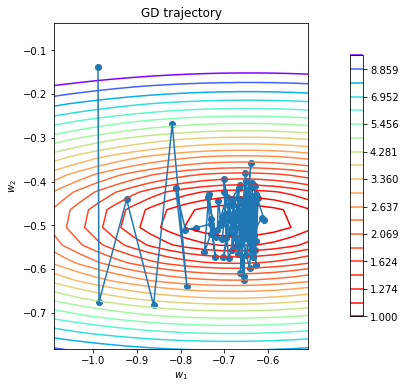

In [132]:
# -- YOUR CODE HERE --
lr_list = np.array([0.0005, 0.0035, 0.005, 0.005, 0.01])
batch_size_list = np.array([6,10,60,150,17])
loss = MSELoss()
w_init = np.random.uniform(-2, 2, (n_features))
for i in range(len(lr_list)):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr_list[i], batch_size_list[i], 100)
    print('lr =',lr_list[i], '; batch size =', batch_size_list[i])
    plot_gd(w_list, X, y, loss)
    
# при маленькой длине шага графики не так сильно штормит, даже при малом batch size.
# при увеличении длины шага, и при малом batch_size возле минимума график сильно колбасит.
# при увеличении batch size график становится плавнее, однако теряется основное преимущество 
# стохастического град. спуска (уменьшение кол-ва вычеслений).
# на последнем графике при мальноком batch_size была выбрана большая длина шага
# при таких параметрах все очень плохо
# в идеале при мальньком batch_size использовать маленькую длину шага
# обычный градиентный спуск плавнее чем стохастический, однако он затрачивает больше вычеслительных ресурсов

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [133]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    loss = MSELoss()
    w_list = np.array([w_init])
    for i in range(n_iterations):
        lr_current = lr* (1/(1+i))**p
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batchX = X[batch_indices]
        batchY = y[batch_indices]
        a = loss.calc_grad(batchX, batchY, w_init) * lr_current
        w_init = w_init - a
        w_list = np.append(w_list, [w_init], axis = 0)
    return(w_list)

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1


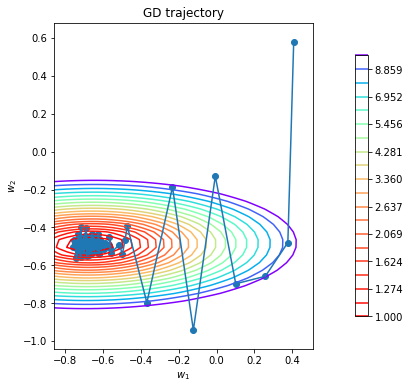

p = 0.4


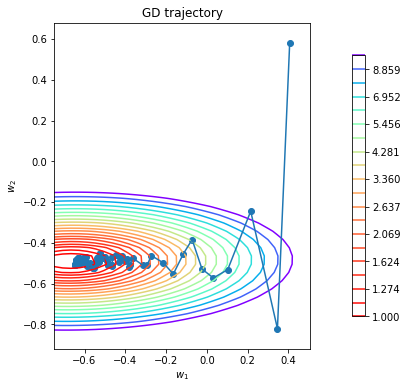

p = 0.7


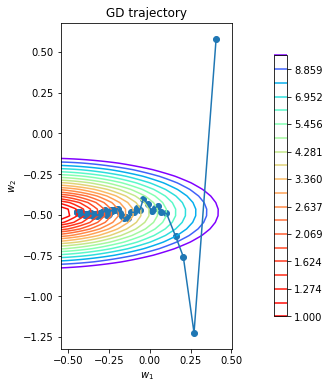

p = 0.8


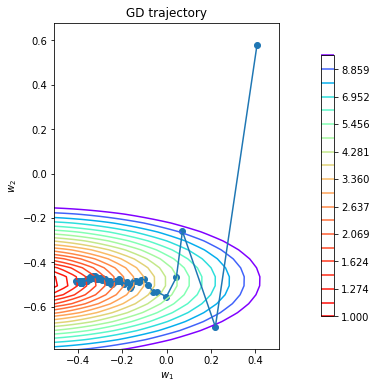

p = 1


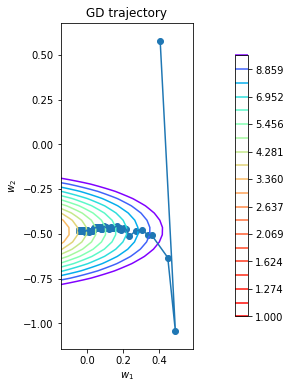

In [134]:
# -- YOUR CODE HERE --
lr= 0.01
batch = 10
p_list = [0.1, 0.4, 0.7, 0.8, 1]
loss = MSELoss()
w_init = np.random.uniform(-2, 2, (n_features))
for i in range(len(p_list)):
    
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch, p_list[i], 100)
    print('p =', p_list[i])
    plot_gd(w_list, X, y, loss)
# чем больше p тем сильнее уменьшается длина шага, т.к. s/(s+t) < 1 и при возведении в маленькую степень 
# это значение увеличичвается.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

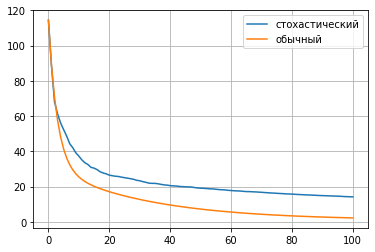

In [135]:
# -- YOUR CODE HERE --
loss = MSELoss()
w_init = np.random.uniform(-2, 2, (n_features))
w_list1 = stochastic_gradient_descent(w_init,X,y,loss,0.001,10,0.4, 100)
w_list2 = gradient_descent(w_init,X,y,loss,0.001,100)
loss_list1 = dict()
loss_list2 = dict()

for i in range(w_list1.shape[0]):
    loss_list1[i] = loss.calc_loss(X,y,w_list1[i])
    loss_list2[i] = loss.calc_loss(X,y,w_list2[i])
fig, ax = plt.subplots()
ax.plot( loss_list1.keys(),loss_list1.values() , label = 'стохастический')
ax.plot(loss_list2.keys(),loss_list2.values(), label = 'обычный')
ax.grid()
ax.legend()
plt.show()
# на данном графике не видно преимуществ SGD, наоборот он доходит до минимума за большее
# количество итераций и его сильнее "штормит", но эти итерации затрачивают в разы меньше вычеслительных ресурсов 
# компьютера, следовательно расчет происходит быстрее (это и есть основное преимущество).
# По данному графику нельзя сделать вывод о времени расчета



## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [136]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
        self.w_init = np.random.uniform(-2, 2, (X.shape[1]) )
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        # -- YOUR CODE HERE --
        self.w_init = np.random.uniform(-2, 2, (X.shape[1]) )
        self.w_list = gradient_descent(self.w_init, X, y, self.loss, self.lr)
       
        self.w = self.w_list[-1] 
        
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        y_pred = np.matmul(X, self.w)
        
        return(y_pred)

        # -- YOUR CODE HERE --

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [137]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [138]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [139]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [140]:

X_raw = X_raw.drop('index', axis=1)
X_raw

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27


In [141]:
# -- YOUR CODE HERE --
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#X_raw.isnull().any() в столбцax 1,5,18,19,21,22 есть пропуски
#if np.nan in y:
#    print(0)
#else:print(1) в y пропускив нет
cat_features_mask = (X_raw.dtypes == 'object').values
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy = 'mean')
X_no_miss = pd.DataFrame(data = mis_replacer.fit_transform(X_real), columns = X_real.columns)
X_cat = X_raw[X_raw.columns[cat_features_mask]]
X_no_miss = pd.concat([X_no_miss, X_cat], axis = 1)
#X_no_miss.isnull().any() остался только 5 столбец
#X_no_miss[5].unique() значеня two и four можно заменить соответствующими числами
Dummy5 = np.zeros_like(X_no_miss[5])
Dummy5[X_no_miss[5] == 'two'] = 2
Dummy5[X_no_miss[5] == 'four'] = 4
X_no_miss[5] = Dummy5
X_real = (X_no_miss[5]).values
#X_no_miss[5].value_counts() заменим 2 пропущенных значения четверкой (самое частовстречаемое значение)
X_no_miss = X_no_miss.replace({5:{0:4}})
#X_no_miss.isnull().any() пропуски заполнены
X_no_miss[15].value_counts() # этот столбец можно переделать в числовой
Dummy15 = np.zeros_like(X_no_miss[15])
Dummy15[X_no_miss[15] == 'four'] = 4
Dummy15[X_no_miss[15] == 'six'] = 6
Dummy15[X_no_miss[15] == 'five'] = 5
Dummy15[X_no_miss[15] == 'two'] = 2
Dummy15[X_no_miss[15] == 'eight'] = 8
Dummy15[X_no_miss[15] == 'three'] = 3
Dummy15[X_no_miss[15] == 'twelve'] = 12
X_no_miss[15] = Dummy15
X_no_miss = pd.get_dummies(X_no_miss, drop_first = True)
np.random.seed(12345)
X_train, X_test, y_train, y_test  = train_test_split(X_no_miss, y, test_size=0.3)
scaler = StandardScaler()
cat_features_mask = (X_train.dtypes == 'uint8').values
X_train_num = X_train[X_train.columns[~cat_features_mask]]
X_train_cat = X_train[X_train.columns[cat_features_mask]]
X_test_num = X_test[X_test.columns[~cat_features_mask]]
X_test_cat = X_test[X_test.columns[cat_features_mask]]
col = X_train_num.columns
raw = X_train_num.index
col1 = X_test_num.columns
raw1 = X_test_num.index

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train_num)
X_test_num = scaler.transform(X_test_num)
X_train = pd.DataFrame(data = X_train_num, index=raw ,columns=col)
X_train = pd.concat([X_train, X_train_cat], axis = 1)
X_test = pd.DataFrame(data = X_test_num, index=raw1 ,columns=col1)
X_test = pd.concat([X_test, X_test_cat], axis = 1)

print(X_test.isnull().any().any())
print(X_train.isnull().any().any())
X_train


False
False


,0,1,9,10,11,12,13,16,18,19,...,15_6,15_8,15_12,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
24,0.110456,0.767711,-0.852965,-1.406498,-1.065446,-1.297489,-1.128284,-0.944700,-1.368759,-0.153841,...,0,0,0,1,0,0,0,0,0,0
51,0.110456,-0.396928,-0.949242,-0.645239,-0.876093,0.153708,-1.201235,-0.921014,-0.959625,-0.414238,...,0,0,0,1,0,0,0,0,0,0
68,-1.607755,-0.097449,2.661133,2.223507,2.674265,1.148815,2.147034,2.465964,0.453748,-0.576986,...,0,1,0,0,0,0,0,1,0,0
35,-0.748649,-1.561566,-0.403674,-1.422525,-1.018107,1.895146,-1.062815,-0.897329,-1.554729,0.432051,...,0,0,0,0,0,0,0,0,0,0
137,-0.748649,-0.762957,-0.291352,-0.228549,-0.308036,-0.509696,-0.836479,-0.518367,1.048853,-2.074267,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,-0.748649,-0.097449,-0.467859,0.532710,0.212683,0.609799,-0.024664,0.050077,0.453748,2.026981,...,0,0,0,0,0,0,0,1,0,0
169,-1.607755,-1.994146,0.543046,0.059928,0.212683,0.485411,-0.497911,-0.186774,-0.104162,0.855196,...,0,0,0,0,0,0,0,1,0,0
164,0.969562,0.301855,-0.098798,0.108007,-0.213360,-0.717010,-0.105098,0.381669,1.048853,0.724998,...,0,0,0,0,0,0,0,1,0,0
129,0.969562,-0.696406,0.013525,0.941386,0.212683,0.982964,0.192318,-0.210460,0.751300,-0.674634,...,0,0,0,0,0,0,0,1,0,0


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [142]:
# -- YOUR CODE HERE --
linear_regression = LinearRegression(MSELoss())
linear_regression.fit(X_train, y_train)
y_pred_train = linear_regression.predict(X_train)
y_pred_test = linear_regression.predict(X_test)


**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [143]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, y_pred_train))
print(mean_squared_error(y_test, y_pred_test))

# -- YOUR CODE HERE --

1849069.845560007
12367139.25281223


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [144]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        
        Q1 = mean_squared_error(np.matmul(X, w), y) + self.coef * np.sum(np.power(w[:-1], 2))
        return(Q1)
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        self.w = w
        self.w[-1] = 0
        
        self.gradQ1 = (2* (np.matmul(X.transpose(), np.matmul(X, w)-y)) / X.shape[0]) + (2 * self.coef * self.w)
        return(self.gradQ1)
        
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [145]:
linear_regression1 = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [146]:
# -- YOUR CODE HERE --
linear_regression1 = LinearRegression(MSEL2Loss(0.01))
linear_regression1.fit(X_train, y_train)
y_pred_train1 = linear_regression1.predict(X_train)
y_pred_test1 = linear_regression1.predict(X_test)
print(mean_squared_error(y_train, y_pred_train1))
print(mean_squared_error(y_test, y_pred_test1))
# ошибка на тренировчной выборке увеличилась в приверно 2 раза
# ошибка на тренировочной выборке уменьшилась чуть меньше чем в 2 раза

3226162.8563480135
8300542.82093809


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [120]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        self.z = (np.matmul(X,w)) - y
        self.Q = 0
        for i in self.z:
            if (i > (0-1)*self.eps) and (i < self.eps):
                self.Q += (i**2) / 2
            else:
                self.Q += self.eps * (abs(z) - self.eps / 2)
        self.Q = self.Q / X.shape[0]
        return(self.Q)
            
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        self.z = (np.matmul(X,w)) - y
        self.Xt = X.transpose()
        self.gradQ = np.array([])
        for i in range(len(self.z)):
            if (self.z[i] > (0-1)*self.eps) and (self.z[i] < self.eps):
                self.gradQ = np.append(self.gradQ, (self.z[i] ** 2) / 2)
            else: self.gradQ = np.append(self.gradQ, self.eps * np.sign(self.z[i]))
        return(self.gradQ)
            # не успел доделать (((
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [121]:
# -- YOUR CODE HERE --
linear_regression2 = LinearRegression(HuberLoss(1))
linear_regression2.fit(X_train, y_train)
y_pred_train1 = linear_regression2.predict(X_train)
y_pred_test1 = linear_regression2.predict(X_test)
print(mean_squared_error(y_train, y_pred_train1))
print(mean_squared_error(y_test, y_pred_test1))

ValueError: operands could not be broadcast together with shapes (65,) (140,) 

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [ ]:
# -- YOUR MEME HERE --

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
# -- YOUR CODE HERE --